# Продвинутое машинное обучение: ДЗ 1

Первое ДЗ состоит из двух частей: первая часть про теорему Байеса и общие вероятностные рассуждения, вторая часть — про линейную регрессию. В качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для пользователя snikolenko). Решение обязательно нужно сдать на портале Академии.


##  Содержание <a name = 'outline'></a>
* [Часть I: О теореме Байеса](#bayes) 
    * [Задание 1](#task_1_1)
    * [Задание 2](#task_1_2)
    * [Задание 3](#task_1_3)


* [Часть II: О линейной регрессии](#linear_regression)
    * [Задание 1](#task_2_1)
    * [Задание 2](#task_2_2)
    * [Задание 3](#task_2_3)
    * [Задание 4](#task_2_4)
    * [Задание 5](#task_2_5)

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 6

from plotly import graph_objects as go, subplots
import ipywidgets as widgets
from ipywidgets import interact, widget, fixed

import numpy as np
import pandas as pd

import pathlib
from urllib.request import urlretrieve

from datetime import datetime


## Часть I: О теореме Байеса <a name = "bayes"/>

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.


### Задание 1 <a name = "task_1_1"/>

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Решение

<i>Введем обозначения событий</i>:

A - человек виновен

B - у человека группа крови, как у убийцы

$
P(B) = 0.01
\\
P(\overline{B}) = 0.99
\\
P(B|A) =  1
\\
P(\overline{B}|A) = 0
$

<i>Что оценил прокурор?</i>

$
P(B|\overline{A}) = 0.01
\\
P(A) = 0.99
$

<i>Что должен был оценить прокурор?</i>

Прокурор должен был оценить веротности того, что подсудимый виновен при условии, что у него группа крови, как у убийцы. То есть вероятности $P(A|B) = \frac{P(B|A)P(A)}{P(B)} = 100 * P(A)$

<i>В чем не прав прокурор?</i>

Прокурор дал неверную оценку вероятности $P(B|\overline{A}) = \frac{P(B)P(\overline{A}|B)}{P(\overline{A})} = 0.01 * \frac{P(\overline{A}|B)}{P(\overline{A})}$, а на самом деле имел в виду  $P(B)$

И сделал неверное предположение $P(A) = 1 - P(B|\overline{A})$


### Задание 2 <a name = "task_1_2"/>

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


#### Решение

<i>Обозначения событий</i>:

A - человек виновен

B - у человека группа крови, как у убийцы

<i>Что оценил адвокат?</i>

$P(A|B)=0.0001$ 

<i> Что должен был оценить? </i>

Для защиты нужно было оценить $P(B|\overline{A}) или P(\overline{A}|B)$

 $P(\overline{A}|B) = \frac{P(B|\overline{A})P(\overline{A})}{P(B)}$
 

### Задание 3 <a name = "task_1_3"/>

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


<i>Введем обозначения событий</i>:

A - человек болен

B - тест показывает, что человек болен

<i>Исходя из условия, можем определить следующие вероятности</i>

$
P(A) = 0.01
\\
P(\overline{A})=0.99
\\
P(B|\overline{A}) = 0.05
\\
P(\overline{B}|\overline{A})= 0.95
\\
P(\overline{B}|A) = 0.05
\\
P(B|A)=0.95
$

<i>Апостериорная вероятность болезни после положительного теста:</i>

$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}= \frac{P(B|A)P(A)}{P(B|A)P(A) + P(\overline{A})P(B|\overline{A})}
$

<i>Апостериорная вероятность болезни после отрицательного теста:</i>

$
P(A|\overline{B}) = \frac{P(\overline{B}|A)P(A)}{P(\overline{B})}= \frac{P(\overline{B}|A)P(A)}{P(\overline{B}|A)P(A) + P(\overline{A})P(\overline{B}|\overline{A})}
$

Обозначим вероятности, на которые могут повлиять врачи, как $FP=P(B|\overline{A})$ - false positive, и $FN=P(\overline{B}|A)$ - false negative.

Тогда можно произвести следующие замены в формулах:

$
P(\overline{B}|A)=FN
\\
P(B|\overline{A})=FP
\\
P(B|A)=1-FN
\\
P(\overline{B}|\overline{A})=1-FP
$

<i>Получаем:</i>

$
P(A|B) = \frac{0.01(1-FN)}{0.01(1-FN) + 0.99FP}
\\
P(A|\overline{B}) = \frac{0.01FN}{0.01FN + 0.99(1-FP)}
$

In [6]:
def a_posterior_b(fn, fp):
    return (1-fn)*0.01 / ((1-fn)*0.01 + 0.99*fn)

def a_posterior_not_b(fn, fp):
     return fn*0.01 / (fn*0.01 + 0.99*(1-fp))
    

In [17]:
fp_prob_widget = widgets.FloatSlider(value=0.05, min=1e-4, max=1, step=0.01, description="FP")
fn_prob_widget = widgets.FloatSlider(value=0.05, min=1e-4, max=1, step=0.01, description="FN")

def plot_posterior(fp_prob, fn_prob):
    fig_widget = go.FigureWidget()
    a_b = a_posterior_b(fp_prob, fn_prob)
    a_not_b = a_posterior_not_b(fp_prob, fn_prob)
    fig_widget.add_bar(x=["Вероятность болезни после положительного теста"], y=[a_b], text=[a_b], textposition="auto", name="P(A|B)")
    fig_widget.add_bar(x=["Вероятность болезни после отрицательного теста"], y=[a_not_b], text=[a_not_b], textposition="auto", name="P(A|notB)")
    return fig_widget

interact(plot_posterior, fp_prob=fp_prob_widget, fn_prob=fn_prob_widget)

interactive(children=(FloatSlider(value=0.05, description='FP', max=1.0, min=0.0001, step=0.01), FloatSlider(v…

<function __main__.plot_posterior(fp_prob, fn_prob)>

Как можно заметить, изменение вероятности ложноотрицательных срабатываний теста, не имеет значительного влияния на итоговые апостериорные вероятности болезни. Да и в целом вероятность болезни после отрицательного теста очень мала.

Поэтому стоит заняться уменьшением вероятности получить положительный результат тестирования на заболевание, при условии, что пациент здоров. В последствии это можетв разы увеличить вероятность болезни после положительного теста.

Ниже на графике продемонстировано влияние улучшения показателя ложноотрицательных срабатываний на итоговые апостериорные вероятности.

In [29]:
def plot_pab(fn):
    fp = np.linspace(0.001, 0.1, num=100)
    fig = subplots.make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(go.Scatter(x=fp, y=a_posterior_b(fp, fn),     name="P(A|B)"),    secondary_y=False)
    fig.add_trace(go.Scatter(x=fp, y=a_posterior_not_b(fp, fn), name="P(A|notB)"), secondary_y=True)
    
    fig.update_layout(title="Вероятность болезни в зависимости от вероятности false positive", xaxis=dict(title="FP"))
    fig.update_yaxes(title_text="вероятность болезни после <b>положительного</b> теста", secondary_y=False)
    fig.update_yaxes(title_text="вероятность болезни после <b>положительного</b> теста", secondary_y=True)

    fig.show()
    
    
plot_pab(0.05)    

### Часть II: О линейной регрессии <a name = "linear_regression"/>

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data


### Задание 1 <a name = "task_2_1"/>

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [44]:
path_to_data = pathlib.Path("data", "cowid-covid-data.csv")
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
if not path_to_data.exists():
    path_to_data.parent.mkdir(exist_ok=True)
    urlretrieve(url, str(path_to_data))

all_data = pd.read_csv(path_to_data).infer_objects() 

data = all_data[(all_data['location'] == 'Russia') & (all_data['date'] >= '2020-03-03')].reset_index(drop=True)
# data.loc[data['new_cases'] == 0, 'new_cases'] = 1
data['day'] = data.index

data.describe()

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               361 non-null    object 
 1   continent                              361 non-null    object 
 2   location                               361 non-null    object 
 3   date                                   361 non-null    object 
 4   total_cases                            361 non-null    float64
 5   new_cases                              361 non-null    float64
 6   new_cases_smoothed                     361 non-null    float64
 7   total_deaths                           345 non-null    float64
 8   new_deaths                             345 non-null    float64
 9   new_deaths_smoothed                    361 non-null    float64
 10  total_cases_per_million                361 non-null    float64
 11  new_ca

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day
0,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,0.0,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0
1,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,0.0,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,1
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,2
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,3
4,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,0.0,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,4


In [88]:
TRAIN_DAYS = 50
TEST_DAYS = 200

train = data[:TRAIN_DAYS]
test = data[TRAIN_DAYS:TEST_DAYS]

#### Байесовская линейная регрессия

In [71]:
class BayesLR():
    
    def __init__(self, mu, sigma, noise=None):
        self.mu = mu
        self.sigma = sigma
        
    def fit(self, X, y):
        X = np.hstack((np.ones((len(X), 1)), X))
        noise = np.std(y - X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)))
        beta = 1 / noise ** 2
        mu_prev = self.mu
        sigma_prev = self.sigma
        self.sigma = np.linalg.inv(np.linalg.inv(sigma_prev) + beta * np.dot(X.T, X))
        self.mu = np.dot(self.sigma, np.dot(np.linalg.inv(sigma_prev), mu_prev) + beta * np.dot(X.T, y))
        
        return self
        
    def predict(self, X):
        X = np.hstack((np.ones((len(X), 1)), X))
        return X.dot(self.mu)
    
    def sample_w(self, n_samples=1000):
        return np.random.multivariate_normal(self.mu, self.sigma, n_samples)
    
    def sample(self, X, n_samples=1000):
        X = np.hstack((np.ones((len(X), 1)), X))
        w = self.sample_w(n_samples)
        return X.dot(w.T)
        

### Задание 2 <a name = "task_2_2"/>

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.


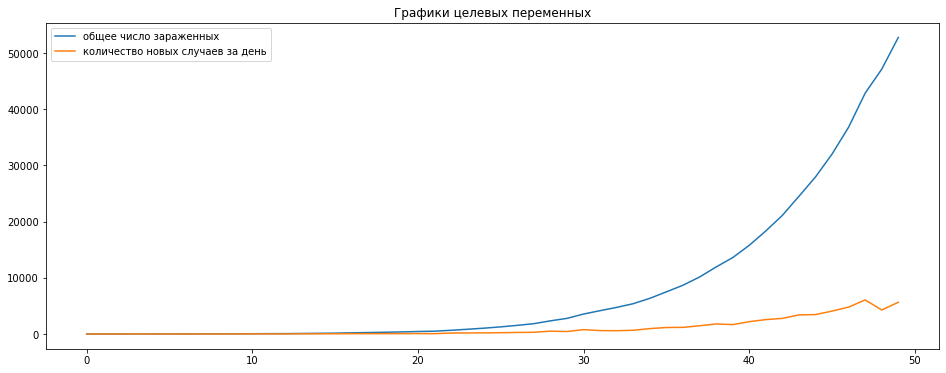

In [49]:
plt.plot(train['total_cases'], label='общее число зараженных')
plt.plot(train['new_cases'], label='количество новых случаев за день')
plt.title('Графики целевых переменных')
plt.legend();

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

Чтобы построить линейную регрессию в данном случае, необходимо найти логарифм целевой переменной

In [86]:
X_train = train[['day']].values
y_train = np.log(train['total_cases'].values)

X_test = test[['day']].values
y_test = np.log(test['total_cases'].values)

X_full = np.arange(data.shape[0]).reshape(-1, 1)


In [72]:
mu_prior = np.array([0, 0])
sigma_prior = 100 * np.array([[1, 0], 
                              [0, 1]])

bayes_lr = BayesLR(mu_prior, sigma_prior)
bayes_lr.fit(X_train, y_train)

print(bayes_lr.mu)
print(bayes_lr.sigma)

[1.8205655  0.19829611]
[[ 9.45888140e-03 -2.86632761e-04]
 [-2.86632761e-04  1.16995814e-05]]


b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).


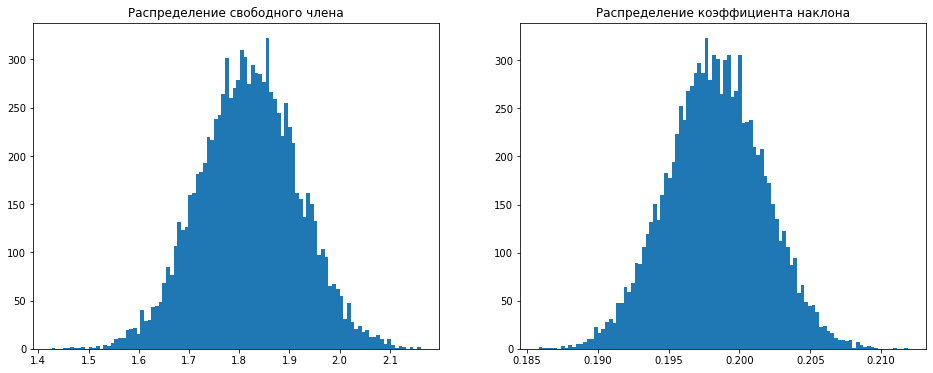

In [73]:
w = bayes_lr.sample_w(n_samples=10000)

fig, ax = plt.subplots(1, 2)

ax[0].hist(w[:, 0], bins=100)
ax[0].set_title('Распределение свободного члена')

ax[1].hist(w[:, 1], bins=100)
ax[1].set_title('Распределение коэффициента наклона')

plt.show()

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


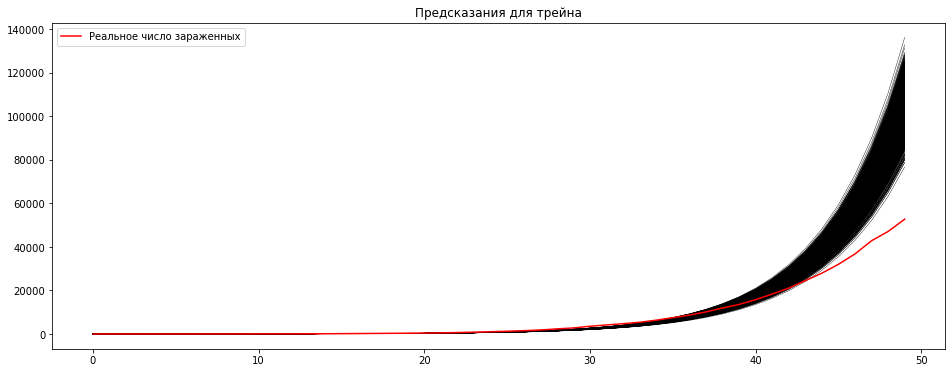

In [77]:
#Семплируем экспоненты для трейна
sampled_train = np.exp(bayes_lr.sample(X_train))

for i in range(sampled_train.shape[1]):
    plt.plot(sampled_train[:, i], 'k-', lw=.4)

plt.plot(np.exp(y_train), color='red', label='Реальное число зараженных')
plt.legend()
plt.title('Предсказания для трейна');

1 мая: 0.7442 млн зараженных
1 июня: 347.8268 млн зараженных
1 сентября: 29127441906.5539 млн зараженных


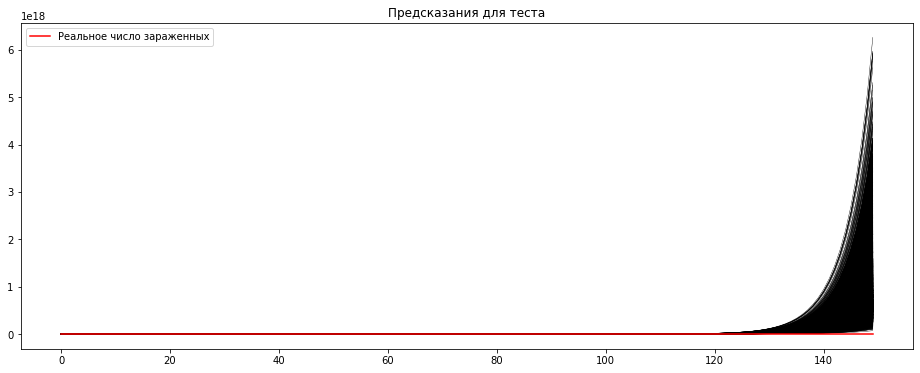

In [87]:
# Посемплируем экспоненты для теста
sampled_test = np.exp(bayes_lr.sample(X_test, n_samples=10000))

# Делаем предсказания
preds_full = np.exp(bayes_lr.predict(X_full))

for i in range(sampled_test.shape[1]):
    plt.plot(sampled_test[:, i], 'k-', lw=.4)

plt.plot(np.exp(y_test), color='red', label='Реальное число зараженных')
plt.legend()
plt.title('Предсказания для теста');


start_day = datetime.strptime('2020-03-03', '%Y-%m-%d')
may_first = datetime.strptime('2020-05-01', '%Y-%m-%d')
june_first = datetime.strptime('2020-06-01', '%Y-%m-%d')
sept_first = datetime.strptime('2020-09-01', '%Y-%m-%d')

till_may = (may_first - start_day).days
till_june = (june_first - start_day).days
till_sept = (sept_first - start_day).days

print(f'1 мая: {preds_full[till_may] / 1_000_000:.4f} млн зараженных')
print(f'1 июня: {preds_full[till_june] / 1_000_000:.4f} млн зараженных')
print(f'1 сентября: {preds_full[till_sept] / 1_000_000:.4f} млн зараженных')


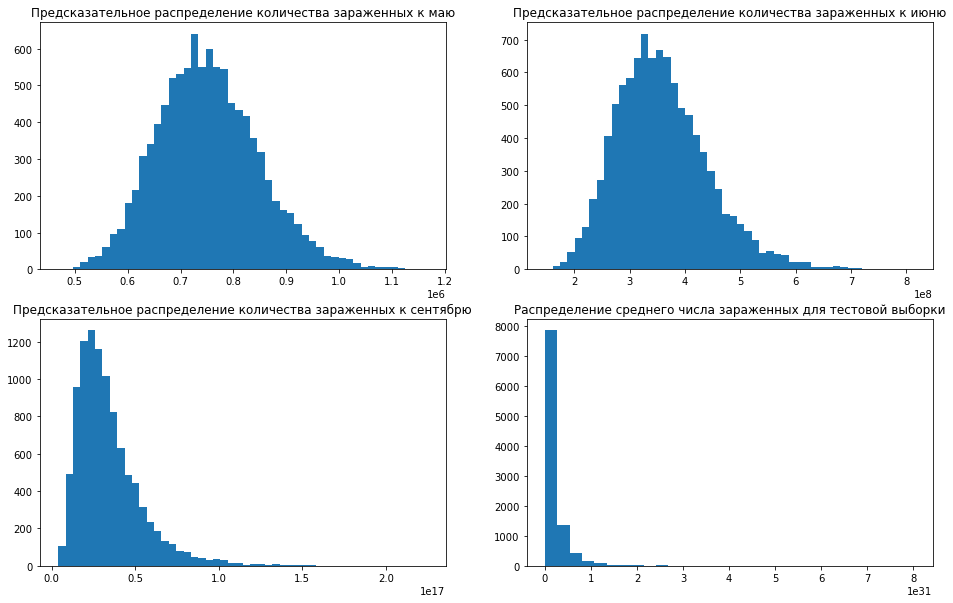

In [83]:
# Посемплируем экспоненты на будущее
sampled_full = np.exp(bayes_lr.sample(X_full, n_samples=10000))

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

ax[0][0].hist(sampled_full[till_may], bins=50)
ax[0][0].set_title('Предсказательное распределение количества зараженных к маю')

ax[0][1].hist(sampled_full[till_june], bins=50)
ax[0][1].set_title('Предсказательное распределение количества зараженных к июню')

ax[1][0].hist(sampled_full[till_sept], bins=50)
ax[1][0].set_title('Предсказательное распределение количества зараженных к сентябрю')

ax[1][1].hist(sampled_test.mean(0), bins=30)
ax[1][1].set_title('Распределение среднего числа зараженных для тестовой выборки')

plt.show()